In [2]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.neighbors import NearestNeighbors

# 1. preparing data

In [3]:
haberman = np.genfromtxt('haberman.data', delimiter=',')

In [4]:
X = np.array([haberman[:,0], haberman[:,1], haberman[:,2]]).T
N = len(X)
n = len(X.T)
print(N,n)

306 3


In [5]:
y = np.array([haberman[:,3]])
yc = []
for i in y.T:
    if i == 1:
        yc.append('r')
    else:
        yc.append('b')

# 2. plotting data

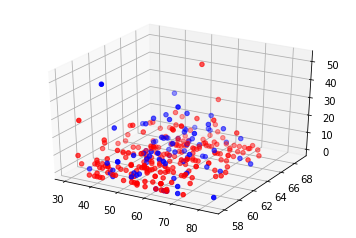

In [6]:
fig = plt.figure()

ax = fig.add_subplot(111, projection='3d')

ax.scatter(X[:,0], X[:,1], X[:,2], c=yc)

plt.show()

# 3. univariate outlier detection

In [10]:
attrmean = np.mean(X,axis=0)
attrstddev = np.std(X,axis=0)
print(attrmean)
print(attrstddev)

[ 52.45751634  62.85294118   4.02614379]
[ 10.7857852    3.24409083   7.17789609]


In [11]:
noutlier = 0
outliers = []
for i in range(0,n):
    for j in range(0, N):
        if np.abs(X[j,i]-attrmean[i]) > 3 * attrstddev[i]:
            noutlier = noutlier + 1
            outliers.append(j+1)
print(noutlier)
print(outliers)

5
[10, 63, 175, 216, 253]


# 4. multivariate outlier detection

In [12]:
knnb = NearestNeighbors(n_neighbors=5, algorithm='ball_tree').fit(X)
[distances,indices] = knnb.kneighbors(X)
dist5 = distances[:,4]
ind5 = indices[:,4]
n5 = np.array(list(zip(dist5, ind5)))

In [17]:
n5 = sorted(n5, key=lambda x: x[0], reverse=True)
for i in range(0,noutlier):
    print(n5[i])

[ 29.13760457  43.        ]
[  22.38302929  160.        ]
[ 15.42724862  22.        ]
[  13.07669683  174.        ]
[  10.48808848  300.        ]


In [ ]:
#end